## LEAFToolbox for Sites
Applies the LEAF-ToolBox for mapping vegetation using satellite imagery over a list of sites, each defined using time stamped vector geographical objects.
Cite as Fernandes, R. et al., 2021, "LEAF Toolbox", Canada Centre for Remote Sensing, https://github.com/rfernand387/LEAF-Toolbox/wiki, DOI: 10.5281/zenodo.4321298.


LEAF currently supports two algorithms: 
SL2PV0 is the algorithm defined by Weiss and Baret (2016) with an update in Weiss and Baret (2020).  
SL2PV1 defined in Fernandes et al. 2023 that attempts to correct for biases over forests observed in SL2PV1.


Note: This is an exact copy of the Javascript version of the LEAF-ToolBox-SL2P for image by image products as implemented on December 1, 2023 17:21 EST: https://code.earthengine.google.com/8ee611fad1609740099eabbfe571189c. You will need a Google Earth Engine Account linked to a Google Account with sufficient disk space for the output.

Refer to https://github.com/rfernand387/LEAF-Toolbox/tree/master/Source-Python for configuration of anaconda environment.


Weiss, M. and Baret, F. 2016. S2ToolBox Level 2 products: LAI, FAPAR, FCOVER, 1.1. ed.
Institut National de la Recherche Agronomique, Avignon, France. https://step.esa.
int/docs/extra/ATBD_S2ToolBox_L2B_V1.1.pdf.

Weiss, M., and Baret, F., 2020. S2ToolBox Level 2 Products: LAI, FAPAR, FCOVER, 2.0. ed.
Institut National de la Recherche Agronomique, Avignon, France. https://step.esa.
int/docs/extra/ATBD_S2ToolBox_L2B_V2.0.pdf.

Fernandes et al., 2023. Evidence of a bias-variance tradeoff when mapping LAI over forests using Sentinel-2 imagery.  subitted to RSE>


In [2]:
# Provide your GEE authentificaton
import ee
ee.Authenticate()
ee.Initialize()

Enter verification code:  4/1AfJohXne3E_DHGRtZ8cXoDVFarXurGvSQZwR_EYVNrwOzz5-6kc2-qSp-F0



Successfully saved authorization token.


In [3]:
# Uncomment this if you are modifying modules
# %load_ext autoreload
# %autoreload 2

In [453]:
# import LEAF modules
import LEAF

# import algorith definitions
import SL2PV0 
import SL2PV1

In [268]:
siteList=["projects/ee-modis250/assets/Nanaimo"]

LEAF.sampleSites

sitesDictionary = LEAF.sampleSites( siteList, \
                                    imageCollectionName="COPERNICUS/S2_SR_HARMONIZED",\
                                    algorithm=SL2PV0, \
                                    variableName="LAI",\
                                    maxCloudcover=90,\
                                    filterSize=0,\
                                    scaleSize=20,\
                                    bufferSize = 0,\
                                    deltaTime = [0,0], \
                                    
Applies a LEAF toolbox algorithm to map a canopy variable for all clear sky unmasked pixels from an input image collection
falling within the spatial and temporal extents of features in a list of sites.

Parameters:

siteList: list of readable GEE feature collection assets.  Features must have a system:time_start and system:time_end property.
imageCollection: input image collection from one of the list defined by GEE
                ["COPERNICUS/S2_SR_HARMONIZED","COPERNICUS/S2_SR_HARMONIZED_10m","LANDSAT/LC08/C02/T1_L2","LANDSAT/LC09/C02/T1_L2","NASA/HLS/HLSL30/v002"]
algorith: python module specifying LEAF algorithm to apply , currently one of list ["SL2PV0","SL2PV1"]
variableName: variable to be mapped from one of the list ["ALBEDO","FAPAR","FCOVER","LAI","CWC","CCC","DASF"] defined by https://github.com/rfernand387/LEAF-Toolbox/wiki/Visualisation-Outputs              
maxCloudCover: maximum input image cloud cover percentage [0,100]
filterSize: width (m) of square filter applied to output
scaleSize: width (m) of aggregation filter applied to input based on default for image collection selected
bufferSize: width (m) of spatial buffer applied to features prior to sampling
deltaTime: dilation (d) of start and end time of sampled features
subsamplingFraction: fraction (0 to 1) of pixels to sample within a feature on any given image
Output:

sitesDictionary: dictionary with keys corresponding to sites and structure.  The value of each key is a dictionary with two keys:
                    'feature' : properties of the sampled feature
                    'SL2PV0' or 'SL2PV1' : a pandas data frame where columns correspond to algorithm output properties and rows correspond to a retrieval within the time and spatial interval of the feature               


In [479]:
                      # Landsat 8
sitesDictionaryL08V0 = LEAF.sampleSites(siteList, \
                                                imageCollectionName='LANDSAT/LC08/C02/T1_L2',\
                                                algorithm=SL2PV0, 
                                                variableName="LAI",\
                                                maxCloudcover=90,\
                                                filterSize=0,\
                                                scaleSize=30,\
                                                bufferSize = 0,\
                                                deltaTime = [0,0], \
                                                subsamplingFraction = 0.99) 
# Landsat 9
sitesDictionaryL09V0 = LEAF.sampleSites(siteList, \
                                                imageCollectionName='LANDSAT/LC09/C02/T1_L2',\
                                                algorithm=SL2PV0, 
                                                variableName="LAI",\
                                                maxCloudcover=90,\
                                                filterSize=0,\
                                                scaleSize=30,\
                                                deltaTime = [0,0], \
                                                subsamplingFraction = 0.99)  

# HLS
sitesDictionaryHLSV0 = LEAF.sampleSites(siteList, \
                                                imageCollectionName="NASA/HLS/HLSL30/v002",\
                                                algorithm=SL2PV0, 
                                                variableName="LAI",\
                                                maxCloudcover=90,\
                                                filterSize=0,\
                                                scaleSize=30,\
                                                deltaTime = [0,0], \
                                                subsamplingFraction = 0.99)         

# S2
sitesDictionaryS2V0 = LEAF.sampleSites(siteList, \
                                                imageCollectionName="COPERNICUS/S2_SR_HARMONIZED",\
                                                algorithm=SL2PV0, 
                                                variableName="LAI",\
                                                maxCloudcover=90,\
                                                filterSize=0,\
                                                scaleSize=30,\
                                                deltaTime = [0,0], \
                                                subsamplingFraction = 0.99)                                                     


STARTING LEAF SITE
 
Site:  projects/ee-modis250/assets/Nanaimo  with  1  features.
Processing feature: 0  from  2020-12-31 19:00:00  to  2021-11-30 19:00:00
startDate   2020-12-31 19:00:00
endDate     2021-01-31 19:00:00
Name: 0, dtype: datetime64[ns]
startDate   2021-01-31 19:00:00
endDate     2021-02-28 19:00:00
Name: 1, dtype: datetime64[ns]
startDate   2021-02-28 19:00:00
endDate     2021-03-31 19:00:00
Name: 2, dtype: datetime64[ns]
startDate   2021-03-31 19:00:00
endDate     2021-04-30 19:00:00
Name: 3, dtype: datetime64[ns]
startDate   2021-04-30 19:00:00
endDate     2021-05-31 19:00:00
Name: 4, dtype: datetime64[ns]
startDate   2021-05-31 19:00:00
endDate     2021-06-30 19:00:00
Name: 5, dtype: datetime64[ns]
startDate   2021-06-30 19:00:00
endDate     2021-07-31 19:00:00
Name: 6, dtype: datetime64[ns]
startDate   2021-07-31 19:00:00
endDate     2021-08-31 19:00:00
Name: 7, dtype: datetime64[ns]
startDate   2021-08-31 19:00:00
endDate     2021-09-30 19:00:00
Name: 8, dtype: d

In [472]:
# Landsat 8
sitesDictionaryL08 = LEAF.sampleSites(siteList, \
                                                imageCollectionName='LANDSAT/LC08/C02/T1_L2',\
                                                algorithm=SL2PV1, 
                                                variableName="LAI",\
                                                maxCloudcover=90,\
                                                filterSize=0,\
                                                scaleSize=30,\
                                                bufferSize = 0,\
                                                deltaTime = [0,0], \
                                                subsamplingFraction = 0.99) 
# Landsat 9
sitesDictionaryL09 = LEAF.sampleSites(siteList, \
                                                imageCollectionName='LANDSAT/LC09/C02/T1_L2',\
                                                algorithm=SL2PV1, 
                                                variableName="LAI",\
                                                maxCloudcover=90,\
                                                filterSize=0,\
                                                scaleSize=30,\
                                                deltaTime = [0,0], \
                                                subsamplingFraction = 0.99)  

# HLS
sitesDictionaryHLS = LEAF.sampleSites(siteList, \
                                                imageCollectionName="NASA/HLS/HLSL30/v002",\
                                                algorithm=SL2PV1, 
                                                variableName="LAI",\
                                                maxCloudcover=90,\
                                                filterSize=0,\
                                                scaleSize=30,\
                                                deltaTime = [0,0], \
                                                subsamplingFraction = 0.99)         

# S2
sitesDictionaryS2 = LEAF.sampleSites(siteList, \
                                                imageCollectionName="COPERNICUS/S2_SR_HARMONIZED",\
                                                algorithm=SL2PV1, 
                                                variableName="LAI",\
                                                maxCloudcover=90,\
                                                filterSize=0,\
                                                scaleSize=30,\
                                                deltaTime = [0,0], \
                                                subsamplingFraction = 0.99)   


STARTING LEAF SITE
 
Site:  projects/ee-modis250/assets/Nanaimo  with  1  features.
Processing feature: 0  from  2020-12-31 19:00:00  to  2021-11-30 19:00:00
startDate   2020-12-31 19:00:00
endDate     2021-01-31 19:00:00
Name: 0, dtype: datetime64[ns]
No images found.
startDate   2021-01-31 19:00:00
endDate     2021-02-28 19:00:00
Name: 1, dtype: datetime64[ns]
No images found.
startDate   2021-02-28 19:00:00
endDate     2021-03-31 19:00:00
Name: 2, dtype: datetime64[ns]
No images found.
startDate   2021-03-31 19:00:00
endDate     2021-04-30 19:00:00
Name: 3, dtype: datetime64[ns]
No images found.
startDate   2021-04-30 19:00:00
endDate     2021-05-31 19:00:00
Name: 4, dtype: datetime64[ns]
No images found.
startDate   2021-05-31 19:00:00
endDate     2021-06-30 19:00:00
Name: 5, dtype: datetime64[ns]
No images found.
startDate   2021-06-30 19:00:00
endDate     2021-07-31 19:00:00
Name: 6, dtype: datetime64[ns]
No images found.
startDate   2021-07-31 19:00:00
endDate     2021-08-31 19

In [475]:
import pandas as pd
import matplotlib.pyplot as plt

In [480]:
siteNum=0;
site=sitesDictionaryL08[siteList[siteNum]]
df=site[siteNum]['SL2PV1']
df['utc'] =  pd.to_datetime(df['date'],unit='ms')
pixelL08=df.loc[(df['longitude']==df.loc[0].longitude) & (df['latitude']==df.loc[0].latitude) & df['QC']==0]
site=sitesDictionaryL09[siteList[siteNum]]
df=site[siteNum]['SL2PV1']
df['utc'] =  pd.to_datetime(df['date'],unit='ms')
pixelL09=df.loc[(df['longitude']==df.loc[0].longitude) & (df['latitude']==df.loc[0].latitude) & df['QC']==0]
site=sitesDictionaryHLS[siteList[siteNum]]
df=site[siteNum]['SL2PV1']
df['utc'] =  pd.to_datetime(df['date'],unit='ms')
pixelHLS=df.loc[(df['longitude']==df.loc[0].longitude) & (df['latitude']==df.loc[0].latitude) & df['QC']==0]
site=sitesDictionaryS2[siteList[siteNum]]
df=site[siteNum]['SL2PV1']
df['utc'] =  pd.to_datetime(df['date'],unit='ms')
pixelS2=df.loc[(df['longitude']==df.loc[0].longitude) & (df['latitude']==df.loc[0].latitude) & df['QC']==0]

site=sitesDictionaryL08V0[siteList[siteNum]]
df=site[siteNum]['SL2PV0']
df['utc'] =  pd.to_datetime(df['date'],unit='ms')
pixelL08V0=df.loc[(df['longitude']==df.loc[0].longitude) & (df['latitude']==df.loc[0].latitude) & df['QC']==0]
site=sitesDictionaryL09V0[siteList[siteNum]]
df=site[siteNum]['SL2PV0']
df['utc'] =  pd.to_datetime(df['date'],unit='ms')
pixelL09V0=df.loc[(df['longitude']==df.loc[0].longitude) & (df['latitude']==df.loc[0].latitude) & df['QC']==0]
site=sitesDictionaryHLSV0[siteList[siteNum]]
df=site[siteNum]['SL2PV0']
df['utc'] =  pd.to_datetime(df['date'],unit='ms')
pixelHLSV0=df.loc[(df['longitude']==df.loc[0].longitude) & (df['latitude']==df.loc[0].latitude) & df['QC']==0]
site=sitesDictionaryS2V0[siteList[siteNum]]
df=site[siteNum]['SL2PV0']
df['utc'] =  pd.to_datetime(df['date'],unit='ms')
pixelS2V0=df.loc[(df['longitude']==df.loc[0].longitude) & (df['latitude']==df.loc[0].latitude) & df['QC']==0]

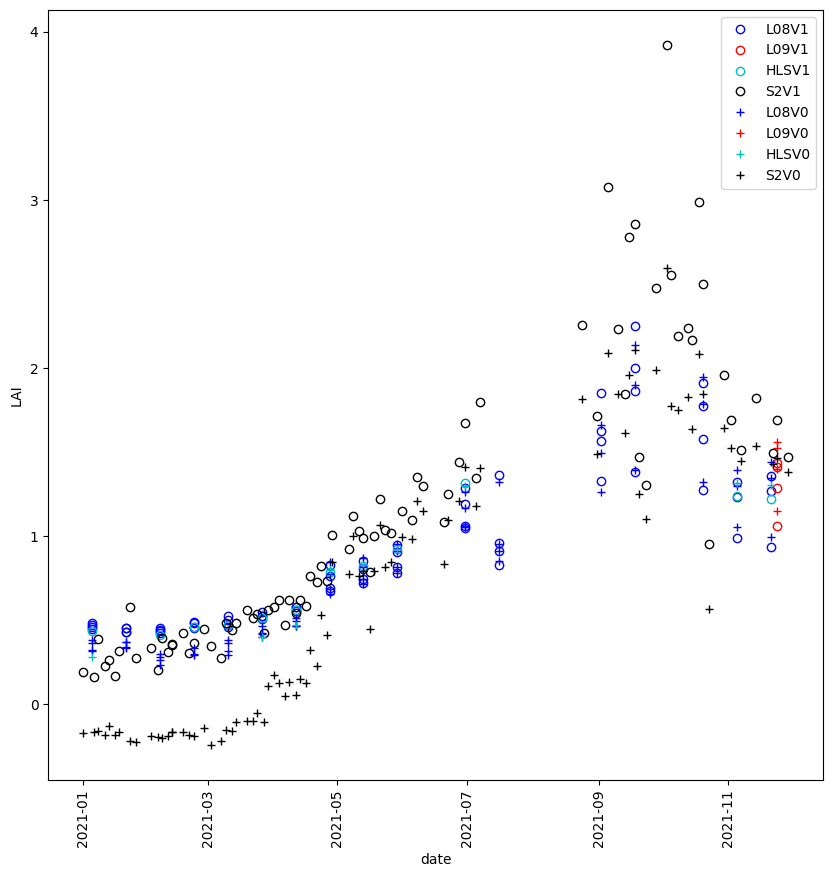

In [488]:
fig,ax = plt.subplots(1,1,figsize=[10,10])
plt.plot(pixelL08['utc'],pixelL08['estimateLAI'],'ob',markerfacecolor='none', label='L08V1')
plt.plot(pixelL09['utc'],pixelL09['estimateLAI'],'or',markerfacecolor='none', label='L09V1')
plt.plot(pixelHLS['utc'],pixelHLS['estimateLAI'],'oc',markerfacecolor='none', label='HLSV1')
plt.plot(pixelS2['utc'],pixelS2['estimateLAI'],'ok',markerfacecolor='none',label='S2V1')
plt.plot(pixelL08V0['utc'],pixelL08V0['estimateLAI'],'+b',label='L08V0')
plt.plot(pixelL09V0['utc'],pixelL09V0['estimateLAI'],'+r',label='L09V0')
plt.plot(pixelHLSV0['utc'],pixelHLSV0['estimateLAI'],'+c',label='HLSV0')
plt.plot(pixelS2V0['utc'],pixelS2V0['estimateLAI'],'+k',label='S2V0')
ax.legend()
ax.set_xlabel('date')
ax.set_ylabel('LAI')
plt.xticks(rotation=90);